In [18]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import preprocessing
from alphavantage_api.AlphaVantageCommodities import AlphaVantageCommodities
from dotenv import load_dotenv
import seaborn as sns

load_dotenv()

True

In [2]:
# https://www.alphavantage.co/academy/

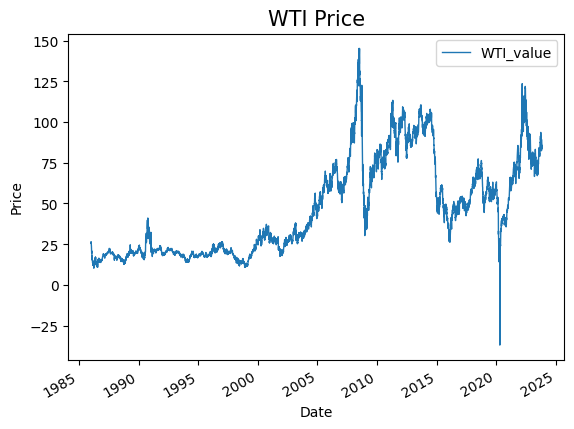

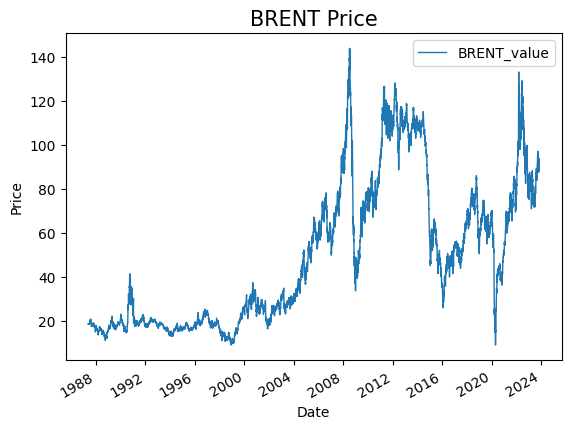

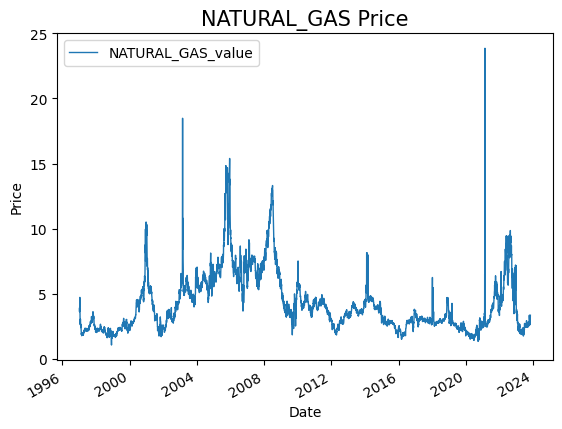

In [3]:
avc = AlphaVantageCommodities()
for symbol in avc.get_all_curated_series_ids():
    avc.plot_series_id(symbol)

In [4]:
df_wti = avc.get_data_as_pandas_df('WTI')
df_brent = avc.get_data_as_pandas_df('BRENT')
df_gas = avc.get_data_as_pandas_df('NATURAL_GAS')

In [5]:
df_wti.tail()

,date,WTI_value
4,2023-10-24,84.580002
3,2023-10-25,86.070000
2,2023-10-26,83.800003
1,2023-10-27,86.040001
0,2023-10-30,83.029999


In [6]:
df_brent.tail()

,date,BRENT_value
4,2023-10-24,88.000000
3,2023-10-25,90.139999
2,2023-10-26,88.449997
1,2023-10-27,90.730003
0,2023-10-30,90.730003


In [7]:
df_merged = pd.merge(df_wti, df_brent, on='date', how='outer', suffixes=(False, False))
df_merged = pd.merge(df_merged, df_gas, on='date', how='outer', suffixes=(False, False))
df_merged.head()

,date,WTI_value,BRENT_value,NATURAL_GAS_value
0,1986-01-02,25.559999,NaN,NaN
1,1986-01-03,26.000000,NaN,NaN
2,1986-01-06,26.530001,NaN,NaN
3,1986-01-07,25.850000,NaN,NaN
4,1986-01-08,25.870001,NaN,NaN


In [8]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9698 entries, 0 to 9697
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               9698 non-null   datetime64[ns]
 1   WTI_value          9530 non-null   float32       
 2   BRENT_value        9250 non-null   float32       
 3   NATURAL_GAS_value  6743 non-null   float32       
dtypes: datetime64[ns](1), float32(3)
memory usage: 189.5 KB


In [9]:
df_merged.sort_values(by='date', inplace = True)

<Axes: xlabel='date'>

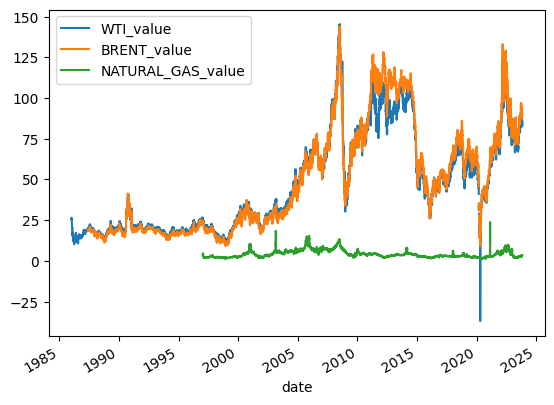

In [10]:
df_merged.plot(x="date")

In [12]:
df_merged = avc.get_data_as_pandas_df_multiple_series_ids(['WTI','BRENT','NATURAL_GAS'])

<Axes: xlabel='date'>

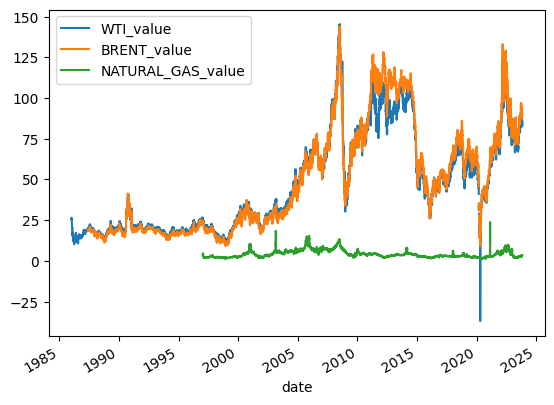

In [13]:
df_merged.plot(x="date")

In [21]:
df_corr = df_merged.corr(numeric_only=True)
df_corr

,WTI_value,BRENT_value,NATURAL_GAS_value
WTI_value,1.000000,0.990893,0.363008
BRENT_value,0.990893,1.000000,0.278554
NATURAL_GAS_value,0.363008,0.278554,1.000000


<Axes: >

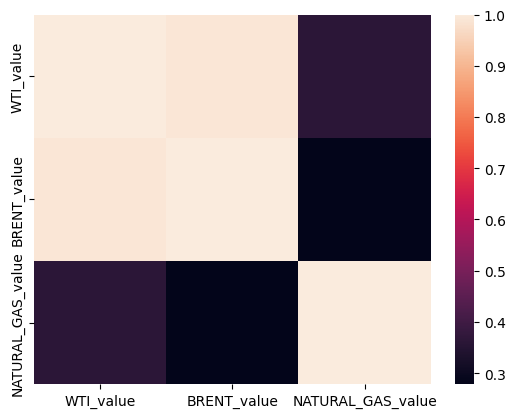

In [22]:
sns.heatmap(df_corr)